In [1]:
import bilby
import matplotlib.pyplot as plt
import numpy as np

/home/sagi/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [30]:
names=["chirp mass prior","q prior", "chieff prior", "z prior", "m1 prior", "m2 prior" ]
samples = [[] for _ in range(6)]  #the for in range creates an empty list of lists (2D list) 
density= [[] for _ in range(6)]   #each list will hold the values and the probability densities of a certain prior
for i in range(len(names)):          #this open up each prior text file
    with open("{}.txt".format(names[i]), "r") as file:
      # Read the contents of the file as a list of strings
      lines = file.readlines()

    # Iterate over the lines in the file
    for line in lines:
      # Splits the line into a list of string numbers
      string_numbers = line.split(",")

      # Convert each string to a flaot
      float_numbers = list(map(float, string_numbers))

      # Add the values to their arrays
      samples[i].append(float_numbers[0])  #sample[0] would hold a list of the values and probability densities of the chirp mass prior and sample[1] would be the same but for the q prior 
      density[i].append(float_numbers[1])

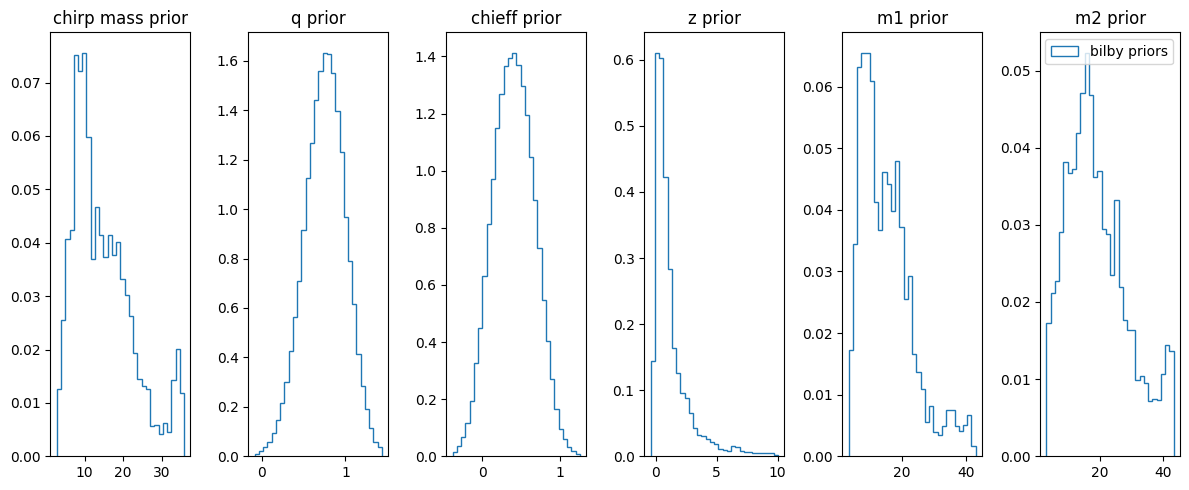

In [39]:
custom_priors = []
fig = plt.figure(figsize=(12, 5))

for i in range(len(names)):
    custom_priors.append (

        bilby.prior.Interped(
            name=names[i],
            xx=samples[i], #plotting chirp mass on the x axis 
            yy=density[i], 
           # minimum=0,
          #  maximum=100,
            #latex_label="chirpmass prior",
        ),
    )

for ii, prior in enumerate(custom_priors):
    fig.add_subplot(1, 6, 1 + ii)
    plt.hist(prior.sample(100000), bins=30, histtype="step", density=True,label="bilby priors")
    plt.title(names[ii])
  

plt.legend()
plt.tight_layout()
plt.show()
plt.close()